Tahmini modeller, gelecekteki sonuçları tahmin etmek ve ölçmek için pratik olmayan ölçümleri tahmin etmek için son derece kullanışlıdır. Örneğin, veri bilimcileri, mahsul verimini yağış ve sıcaklığa bağlı olarak tahmin etmek veya belirli özelliklere sahip hastaların yeni bir ilaca kötü tepki göstermesinin daha muhtemel olup olmadığını belirlemek için öngörücü modelleri kullanabilirler. Özellikle doğrusal regresyondan bahsetmeden önce, tipik bir veri bilimi iş akışının nasıl görünebileceğini kendimize hatırlatalım. Çoğu zaman, cevaplamak istediğimiz bir soru ile başlayacağız ve aşağıdaki gibi bir şey yapacağız:

Makine Öğrenmesi Aşamaları;

- 1. Sorunla ilgili veriler toplayoruz (daha fazlası çoğu zaman daha iyidir).
- 2. Gerekirse verileri temizleyoruz, ki gerekirse den kasıt verileri kontrol ediyoruz eğer veriler temizdeğilse bu adımı yapıyoruz ve  artırıp (feature engineering)  verileri uygun bir formata çevirerek işliyoruz.
- 3. Öncelikler verileri inceleyerek veriler hakkında bilgi sahibi oluyoruz.(Exploratory Data Analysis -EDA)
- 4. Daha sonra elde ettiğimiz bilgilere dayanarak bir model oluşturuyoruz.
- 5. Artık modeli oluşturduğumuza göre, sorumuzun cevabını bulmak için oluşturuduğumuz modelimizi Test verilerimiz üzerinde kontrol ediyoruz.

 Not:Yukarıda belirtilen adımlar kabaca bu şekilde düşünülebilir ancak farklı aşamalar ve ilave işlemlerde gerekebilir. 

### **Doğrusal regresyon**;
- Veri bilimcilerin öngörücü modelleme için kullandıkları en basit ve en yaygın *denetimli makine öğrenme* (Supervised Learning)algoritmalarından biridir. Bu çalışma örneğimizde, ağaçları inceleyeceğiz, ölçmesi kolay olan metriklerden kiraz ağacı hacmini öngören bir model oluşturmak için doğrusal regresyon kullanacağız.

Bu veri kümesini keşfetmek ve doğrusal regresyonun temellerini öğrenmek için bu blog yazısında R'yi kullanacağız. R'ye aşina değilseniz, ve daha önce R öğrenmedi iseniz [ekteki](https://www.dataquest.io/course/r-programming-intermediate/) kurstan R ile ilgili temel bilgi alabilirsiniz. R Veri Analisti yolumuzdaki ara kursları da öneririz. Ayrıca, bazı çok temel istatistik bilgisine sahip olmanıza yardımcı olacaktır, eğer ortalama ve standart bir sapma olduğunu biliyorsanız, takip edebileceksiniz. Modelleri ve görselleştirmeleri kendiniz oluşturmayı denemek istiyorsanız, aşağıdaki R paketlerini kullanıyor olacağız:

- **Veri setleri** Bu pakette çok çeşitli uygulama veri setleri bulunmaktadır. Doğrusal regresyon modelleri oluşturma hakkında bilgi edinmek için bunlardan biri olan, "ağaçlar" veri setini kullanacağız.
- **ggplot2** Bu popüler veri görselleştirme paketini modellerimizin çizimlerini oluşturmak için kullanacağız.
- **scatterplot3d** Bu paketi, daha karmaşık doğrusal regresyon modellerini çoklu yordayıcılar(tahmin ediciler) ile görselleştirmek için kullanacağız.

#### Acaba Ağaç hacmi ölçümü nasıl yapılıyor ?


Ağaç veri kümesi R’in temel veri kümesi paketine dahil edilmiştir ve bu soruyu yanıtlamamıza yardımcı olacaktır. Mevcut (temiz) bir veri kümesiyle çalıştığımızdan, yukarıdaki 1. ve 2. adımlar zaten yapıldığı için 3.adımdaki ön keşif analizlerine geçebiliriz. Bu veri seti nasıl görünüyor?

In [1]:
data(trees)
head(trees)

Girth,Height,Volume
8.3,70,10.3
8.6,65,10.3
8.8,63,10.2
10.5,72,16.4
10.7,81,18.8
10.8,83,19.7


Verilerimizin yapısını anlamak için R'da çok güzel bir fonksiyon var ve şimdi bu fonksiyonu kullanarak verilerimizin yapısını anlayalım. Fonksiyon:str()

In [2]:
str(trees)

'data.frame':	31 obs. of  3 variables:
 $ Girth : num  8.3 8.6 8.8 10.5 10.7 10.8 11 11 11.1 11.2 ...
 $ Height: num  70 65 63 72 81 83 66 75 80 75 ...
 $ Volume: num  10.3 10.3 10.2 16.4 18.8 19.7 15.6 18.2 22.6 19.9 ...


Yukarıda görüldüğü gibi verilerimiz, 31  gözlem ve 3 değişkenden oluşmaktadır. Verileri türleri ise sayısal(numeric).

In [3]:
library(GGally)

Loading required package: ggplot2
Warning message:
“replacing previous import ‘ggplot2::empty’ by ‘plyr::empty’ when loading ‘GGally’”

Bu veri seti, siyah kiraz ağaçlarını tanımlayan 3 değişkenli 31 gözlemden oluşmaktadır:

- **Gövde çevresi (in)**
- **Yükseklik (ft)**
- **Hacim (ft3)**

- Bu metrikler, ağaç ekolojisini inceleyen ormancılar ve bilim adamları için faydalı bilgilerdir. Temel ormancılık araçlarını kullanarak ağaç yüksekliğini ve çevresi ölçmek oldukça kolaydır, ancak ağaç hacmini ölçmek çok daha zordur. Ağacı gerçekten kesmek ve sökmek istemiyorsanız, ağaca tırmanmak ve hassas ölçümler yapmak gibi teknik olarak zor ve zaman alıcı etkinliklere başvurmanız gerekir. Ağaç hacmini yükseklik ve / veya çevre değerinden doğru bir şekilde tahmin edebilmek faydalı olacaktır.

- Prediktif bir model yapıp yapamayacağımıza karar vermek için ilk adım olarak, yordayıcımızla(bağımsız değişkenlerimiz) ile  yanıt(hedef) değişkenleri arasında bir ilişki olup olmadığına bakmak olacaktır. (bu örnekte; çevre, yükseklik ve hacim). Şimdi keşifsel veri görselleştirmesi yapalım ve veriler arasındaki ilişkiyi görsel olarak analiz edelim. Değişkenlerin birbirleriyle ilişkilerini görmek için bir grafik matrisi oluşturmak için GGally paketindeki *ggpairs()* fonksiyonunu kullanıyoruz.

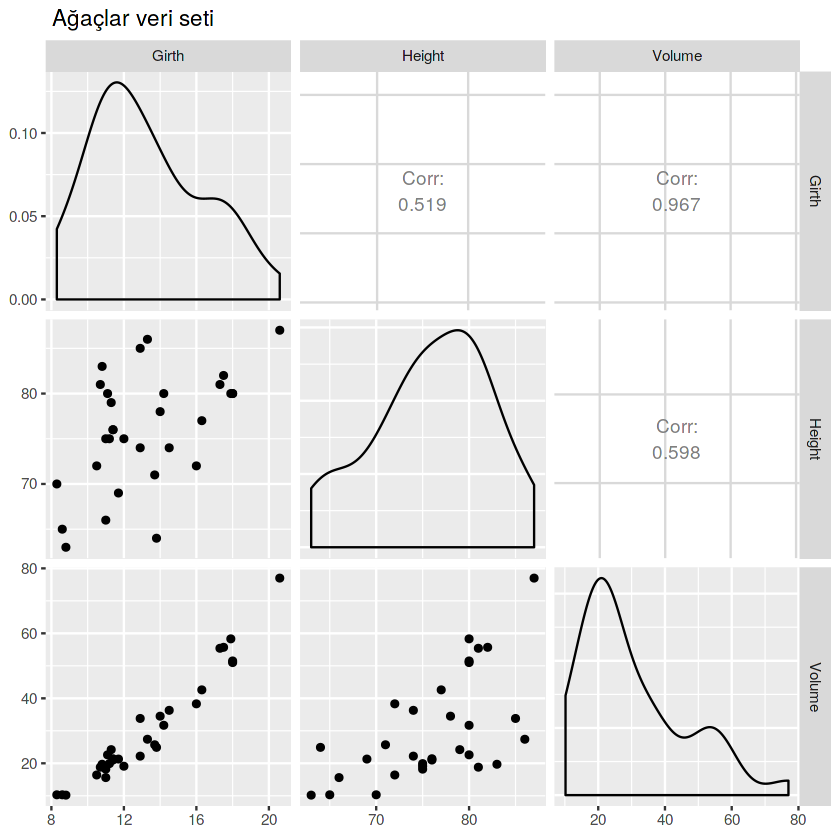

In [4]:
ggpairs(data = trees, columns = 1:3, title = " Ağaçlar veri seti")

Ggpairs () fonksiyonu bize her değişken birleşimi için dağılım grafikleri, yoğunluk grafikleri ve değişkenler arasındaki korelasyonların gücünü verir.Daha önce ggplot2'yi kullandıysanız, bu gösterim tanıdık gelebilir: GGally, bunun gibi karmaşık figürler oluşturmak için basit bir arayüz sağlayan ggplot2'nin bir uzantısıdır. Yukarıdaki grafiklere bakarak, verileri anlamaya ve soru sormaya başlayabiliriz.

Korelasyon katsayıları değişkenlerin birbirleri ile ne kadar yakın ilişkili oldukları hakkında bilgi sağlar; korelasyon katsayısı 1'e ne kadar yakınsa, ilişki o kadar güçlü olur. Dağılım grafikleri değişken çiftleri arasındaki ilişkileri görselleştirmemize izin verir.

Noktaların(scatter plot) net bir görsel desene sahip olduğu grafikler (şekilsiz bir bulut gibi görünmek yerine) daha güçlü bir ilişki olduğunu gösterir. Gelelim bizim sorumuza : Hangi yordayıcı(predictor, bağımsız değişken) değişkenleri cevap(bağımlı, hedef değişken) değişkeniyle ilişkili görünüyor? Ggpairs () çıktısına bakıldığında, çevre(girth) kesinlikle hacim(volume) ile ilişkili görünmektedir: korelasyon katsayısı 1'e yakın ve noktalar doğrusal bir desene sahip gibi görünüyor. Yükseklik ve hacim arasında bir ilişki olabilir, ancak daha zayıf bir ilişki var gibi görünüyor: korelasyon katsayısı daha küçüktür ve dağılım grafiğindeki noktalar daha dağınıktır.

Değişkenler arasında nasıl bir ilişki vardır?  Dağılım grafiğinden, ilişki doğrusal görünüyor. Ağaç çevresi arttıkça ağaç hacminin sürekli arttığını görebiliriz. İlişki güçlü mü, yoksa verilerdeki gürültü sinyalinden mi kaynaklanıyor?

Yükseklik ve hacim arasındaki ilişki net değildir, ancak çevre ile hacim arasındaki ilişki güçlü görünmektedir. Artık, verileri iyi bir şekilde kavradığımıza göre, 4. adıma geçebilir ve bazı tahmini modelleme yapabiliriz.

**Bir hipotez oluşturma**
- Bir hipotez, verilerimizde neler olabileceğini düşündüğümüz bir tahmindir. Bu durumda, kiraz ağacı çevresi ve hacminin ilişkili olduğunu varsayalım. Oluşturduğumuz her hipotezin bir karşılığı vardır: “sıfır hipotezi” (H0). Buradaki boş hipotezimiz, çevrenin ve hacmin birbiriyle ilişkili olmadığını düşünme hipotezidir. İstatistiklerde, boş hipotez(Sıfır Hipotezi(H0), verilerimizi desteklemek veya reddetmek için kullandığımız hipotezdir; Çevrenin ve hacmin  ilgili olduğu durumu  “alternatif” hipotez(Ha) olarak adlandırıyoruz. 

    - Özetlemek gerekirse: 
    H0: Çevre ile hacim arasında bir ilişki yoktur. 
    Ha: Çevre ile hacim arasında bir ilişki vardır. 
    Doğrusal regresyon modelimiz, hipotezimizi test etmek için kullanacağımız şeydir. H0'ı reddetmek için yeterince güçlü kanıtlar bulursak, kiraz ağacı hacmini çevre koşullarından tahmin etmek için modeli kullanabiliriz.
    
  ### Doğrusal regresyon modelinin yapı taşları
  Doğrusal regresyon, ilgilenilen bir yanıt değişkeni (veya bağımlı değişken) ile bir veya daha fazla öngörücü (veya bağımsız) değişken arasındaki ilişkiyi açıklar. Sinyali (öngörücü değişkeninden gelen yanıt değişkeni hakkında ne öğrenebiliriz) gürültüden (öngörücü değişkenindeki yanıt değişkeni hakkında ne öğrenemediğimizi) ayırmamıza yardımcı olur. İlerlerken modelin bunu nasıl yaptığını daha derinlemesine kazacağızöğreneceğiz.
  
  Hemen başlayalım ve ağaç hacmini çevreyle ilgili doğrusal bir model oluşturalım. R, bunu temel lm () fonksiyonu ile basit bir şekilde yapabiliyoruz.

In [5]:
model1 <- lm(Volume ~ Girth, data = trees)

lm () fonksiyonu, verilerimizin tümüne, gözlemlerimizin 31'ine mümkün olduğunca yakın bir çizgiye uyar. Daha spesifik olarak, çizgiye, noktalar ve çizgi arasındaki kare farkının toplamının en aza indirileceği şekilde uyar; Bu yöntem “en küçük kareleri küçültmek(mls)” olarak bilinir. Doğrusal bir regresyon modeli verilere çok iyi uysa bile, uyum mükemmel değildir. Gözlemlerimiz ile onların model tarafından öngörülen değerleri arasındaki mesafelere artıklar(residuals) denir.  

Matematiksel olarak doğrusal regresyon denklemini şu şekilde yazabiliriz: Y ≈ β0 + β1X + ε

    -Y ve X değişkenleri, bizim ilişkilendirdiğimiz verilerimizden gelen yanıt(hedef-Y) ve tahmin(X) değişkenleridir.
    -β0, model engellemesini temsil eden veya y ekseninden geçtiği model katsayısıdır.
    -β1, model eğimini temsil eden model katsayısı, çizginin dikliği ve yönü hakkında bilgi veren sayıdır (pozitif veya negatif).
    -ε Modelde yakalayamadığımız değişkenliği içeren hata terimdir (X bize Y hakkında ne söyleyemez !!)
    

Bu örnekte ; **Tree Volume ≈ Intercept + Slope(Tree Girth) + Error **

Lm () işlevi, verilerimize uyduğu lineer model için kesişme ve eğim katsayılarını tahmin eder. Elimizdeki bir modelde, bu modelin aslında verilere uygun olduğu fikrini doğrulamak için hâlâ bazı çalışmalarımız olduğunu göz önünde bulundurarak 5.adıma geçebiliriz.

**Tahmin Yapmak için bu modeli kullanabilirmiyiz ?**
 Modelimizi tahminlerde bulunmak için kullanıp kullanmamamız şunlara bağlı olacaktır:

- 1. Değişkenler arasında ilişki olmadığı yönündeki boş hipotezi reddedebilir miyiz.
- 2. Modelin verilerimiz için uygun olup olmadığına bakalım.

Mmodelimizin çıktısını kullanarak yukarıdaki şartları sağlayıp sağlamadığını kontrol edelim.

Model çıktısı, hipotezimizi test etmek ve modelin verilerimize ne kadar uygun olduğunu değerlendirmek için ihtiyaç duyduğumuz bilgileri sağlayacaktır. Bu işlem için summary() fonksiyonunu kullanacağız.


In [6]:
summary(model1)


Call:
lm(formula = Volume ~ Girth, data = trees)

Residuals:
   Min     1Q Median     3Q    Max 
-8.065 -3.107  0.152  3.495  9.587 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36.9435     3.3651  -10.98 7.62e-12 ***
Girth         5.0659     0.2474   20.48  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.252 on 29 degrees of freedom
Multiple R-squared:  0.9353,	Adjusted R-squared:  0.9331 
F-statistic: 419.4 on 1 and 29 DF,  p-value: < 2.2e-16


Bu soruların her birine cevap vermek için çıktıyı aşama aşama inceleyelim.

#### **Hipodezim destekleniyor mu ?**
- Katsayılar: Tahmin ve Standart Hata:

- Y'yi kestiği nokta, Çevre değeri sıfır olduğunda beklenen ağaç hacmidir. Tabii ki negatif hacimli bir ağaca sahip olamayız.
- Örneğimizdeki eğim, ağaç çevresinin ağaç hacmine etkisidir. Her bir inçlik artış için ağaç hacminin 5.0659 ft3 arttığını görüyoruz.
- Katsayı standart hataları bize, tahmin edilen katsayıların ortalama yanıtımızın gerçek ortalamasından farklı olduğunu göstermektedir.

    - t değeri:

Bu, tahmini katsayının sıfırdan kaç standart sapma olduğunu ölçen bir test istatistiğidir.

    - Pr (> | t |):

Bu sayı, H0(null hypothesis) doğruysa, t'ye eşit veya daha büyük herhangi bir değeri gözlemleme olasılığı olarak tanımlanan p değeridir. T istatistiği büyüdükçe, p değeri küçülür. Genellikle, anlamlılık için 0,05 kesme kullanırız; p değerleri 0,05'ten küçük olduğunda H0 reddedilir.

H0(Null Hypothesis) hipotezini, ağaç genişliği ve hacmi arasında bir ilişki olduğunu varsayarak reddedebiliriz.


#### ** Modelimiz Veriler ile ne kadar uyumlu ?**

    - Yüzeyde kalan(residuals- artıklar):

Çıktının bu bölümü bize, kalıntılarımızın(residuals) bir özetini sunar (bunların bizim gözlemimizle model arasındaki mesafeleri hatırlayın), bu da modelimizin verilerimize ne kadar uygun olup olmadığını bize anlatır. Artıklar sıfıra yakın oldukça simetrik bir dağılıma sahip olmalıdır. Genel olarak, artıkların normalde sıfıra (yani bir çan eğrisi dağılımı) şeklinde etrafa dağıtılmasını istiyoruz, ancak önemli olan, doğrusal bir modelin veriler için uygun olup olmadığını gösteren, görsel olarak belirgin bir grafik bulunmamasıdır.

Bunu  durumu görselleştirmek için bir histogram yapabiliriz;

Warning message:
“Ignoring unknown parameters: bindwidth”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


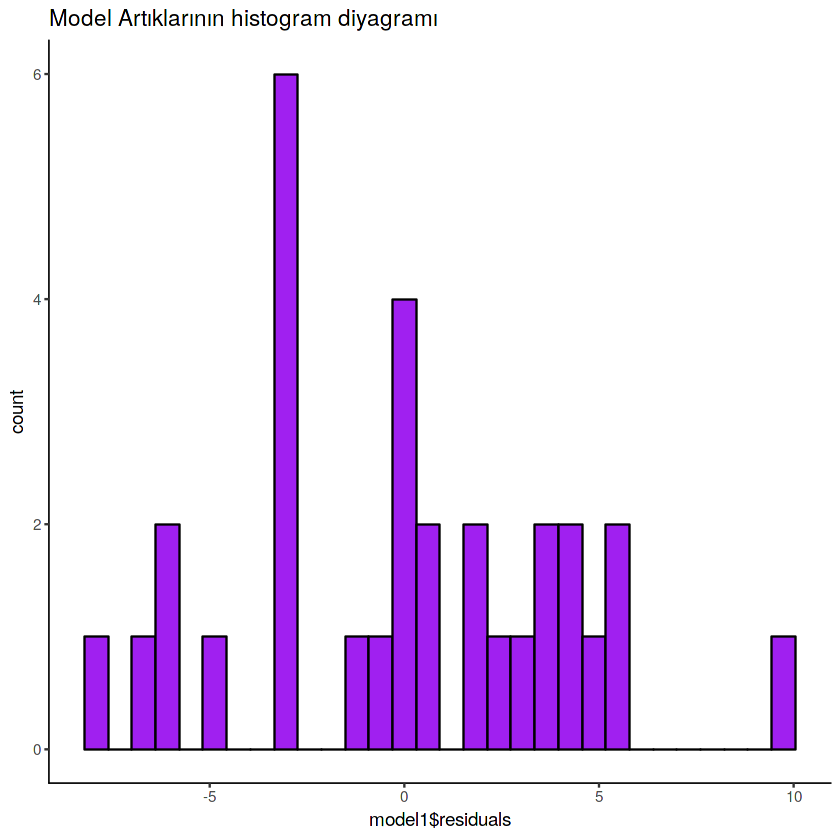

In [7]:
ggplot(data = trees, aes(model1$residuals)) + geom_histogram(bindwidth = 1, color = "black", fill = "purple") +
theme(panel.background = element_rect(fill = "white"),
     axis.line.x = element_line(),
     axis.line.y = element_line()) + 
ggtitle("Model Artıklarının histogram diyagramı")

Artıklar 0 civarında oldukça simetrik görünüyor, bu da modelimizin verilere uygun olduğunu gösteriyor. 

    - Artık standart hata:

 - Bu terim, yanıt değişken ölçümlerimizin takılı doğrusal modelden (model hata terimi) saptığı ortalama miktarı gösterir.
 
    - Serbestlik derecesi (DoF):

- Serbestlik derecelerinin tartışılması oldukça teknik olabilir. Bu yazının amaçları dışında olduğu için, onları bir tahminin hesaplanmasında kullanılan bağımsız bilgi parçalarının sayısı olarak düşünmek yeterlidir. DoF, ölçüm sayısıyla ilişkili ancak aynı değildir.

    - Çoklu R-kare:

 - R2 değeri, verilerimizin doğrusal regresyon modeline ne kadar yakın olduğunun bir ölçüsüdür. R2 değerleri her zaman 0 ile 1 arasındadır; 1'e yakın sayılar, uygun modelleri temsil eder. Modelde daha fazla değişken bulunduğundan, R2 her zaman artar ve bu nedenle, modeli yapmak için kullanılan bağımsız değişkenlerin sayısını hesaba katan düzeltilmiş R2 dahil edilir.
 
     - F istatistik:

- Bu test istatistiği, test ettiğimiz bağımlı ve bağımsız değişkenler arasında bir ilişki olup olmadığını söyler. Genel olarak, büyük bir F daha güçlü bir ilişki olduğunu gösterir.

    - p-değeri:

- Bu p-değeri F istatistiğiyle ilişkilendirilir ve tüm modelin önemini verilerimize göre yorumlamak için kullanılır.

Genişlik ve hacim için verilerimize uygun modelimize bir göz atalım. Bunu ggplot()kullanarak yapabiliriz.

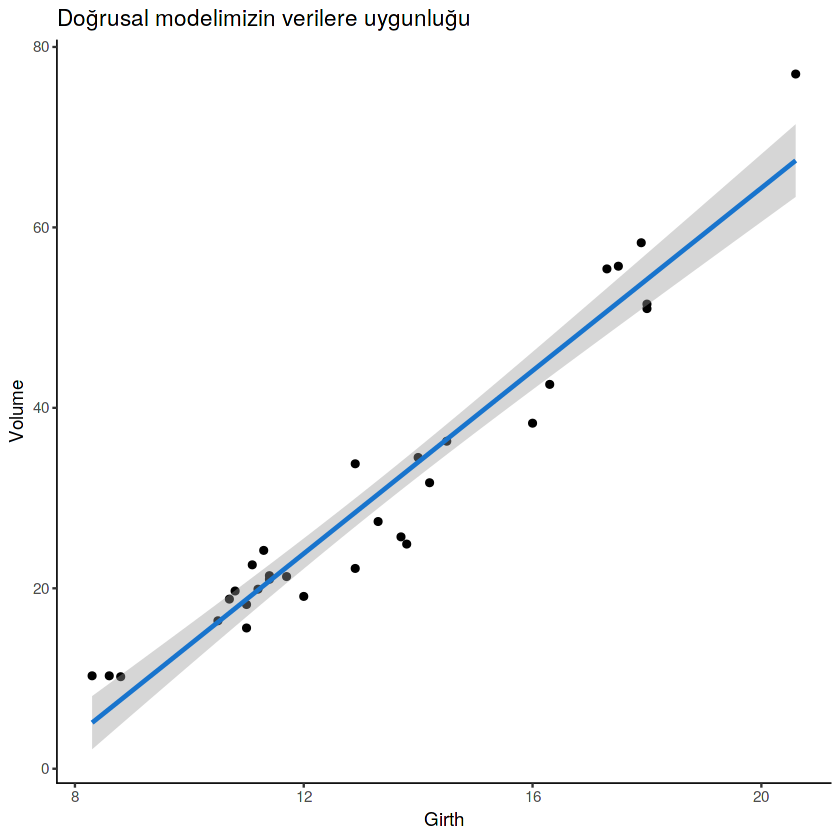

In [8]:
ggplot( data = trees, aes(x = Girth, y = Volume)) + 
geom_point() + 
stat_smooth(method = "lm", col = "dodgerblue3") + 
theme(panel.background =  element_rect(fill = "white"), 
     axis.line.x = element_line(),
     axis.line.y = element_line()) + 
ggtitle("Doğrusal modelimizin verilere uygunluğu")

Çizginin etrafındaki gri gölgeleme, stat_smooth () fonksiyonu için varsayılan olan ve desenlerin görselleştirilmesini kolaylaştırmak için verileri düzgünleştiren 0.95'lik bir güven aralığını temsil eder. Bu 0,95 güven aralığı, tüm kiraz ağaçlarının çevresi ve hacmi için gerçek doğrusal modelin, verilerimize uygun olan regresyon modelinin güven aralığı içinde kalması ihtimalidir. Bu model bizim verilerimize oldukça uygun olmasına rağmen, gözlemlerimizde hala değişkenlik var. Bunun nedeni dünyanın genel olarak düzensiz olmasıdır. Modelimizde, ağaç hacmi sadece ağaç çevresinin bir fonksiyonu değil, aynı zamanda niceliklendirmek için gerekli veriye sahip olmadığımız şeylerin de (ağaç gövdesi şekli arasındaki bireysel farklılıklar, ormancıların gövde çevresi ölçüm tekniklerindeki küçük farklılıklar). Bazen, bu değişkenlik, cevap(Y) ve yordayıcı(X yada X'ler) değişkenler arasında olabilecek herhangi bir ilişkiyi gizler. Ancak burada, verilerimizdeki sinyal, tahminler yapmak için yararlı bir model geliştirmemize izin verecek kadar güçlüdür.

 ### Şimdi Tahmin yapmak için basit Linear Regresyon modelimizi kullanalım
 
 Modelimiz tahminlerde bulunmak için uygundur! Artık ormancılar buna sevinir. Diyelim ki veri kümesinden çıkarılmış bir ağacın çevresi, yüksekliği ve hacmi verileri var. Modelimizi test etmek için bu ağacı kullanabiliriz.
 
  Örnek;
  
     girth	height	volume
    18.2 in	72 ft	46.2 ft3
    
Modelimiz ağacın hacmini çevresinden tahmin etmekte ne kadar başarılı olacak? 

Predict () işlevi(fonksiyonu), model uygulama işlevlerinin kiplerinden tahminlerde bulunmak için genel bir R işlevidir. predict (), doğrusal regresyon modelimizi ve yanıt(Y) değişkeni değerlerini istediğimiz yordayıcı(X) değişkeninin değerlerini argümanlar olarak alır.

In [9]:
predict(model1, data.frame(Girth = 18.2))

1 
55.25513

Bizim hacim tahmini

55,2 ft3. Bu bizim gerçek değerimize yakın, ancak modelimize diğer öngörücü değişkenimiz olan yükseklik bilgisini de eklemek, daha iyi tahminler yapmamızı sağlayabilir.

### Daha fazla tahmin edici eklemek: Çoklu doğrusal regresyon

- Belki ağaç hacmimizle ilgili tahminlerde bulunmak için elimizdeki tüm bilgileri (genişlik ve yükseklik) kullanırsak modelimizin öngörme yeteneğini daha iyi geliştirebiliriz. Yazının başından itibaren beş aşamalı sürecin gerçekten yinelemeli bir süreç olduğunu anlıyoruz - gerçek dünyada, biraz veri alır, bir model oluşturur, modeli geliştiririz, gerektiğinde daha fazla veri ekleriz modeli tekrar oluştururuz vs. ve sonuçlardan memnun kalana ve / veya daha iyisini yapamayacağınıza emin olana kadar yeni bir model oluştururuz. Aynı zamanda iki ayrı regresyon modeli oluşturabilir ve bunları değerlendirebiliriz, ancak bu yaklaşımla ilgili birkaç sorun var. İlk olarak, 5, 15, hatta 50 tahmin değişkenimiz(X) olsaydı ne kadar hantal olacağını hayal edin. İkincisi, iki öngörücü model bize peşinde olduğumuz tek öngörüden ziyade hacim için iki ayrı öngörme verecektir. Belki de en önemlisi, iki ayrı model oluşturmak, model katsayılarını tahmin ederken öngörüler arasındaki ilişkileri hesaba katmamıza izin vermeyecek. Veri setimizde, ilk veri araştırmamıza dayanarak ağaç yüksekliğinin ve çevrenin korelasyonlu olduğunu düşünüyoruz. Bu yazıda daha net görmeye başlayacağımız için, yordayıcı değişkenler arasındaki bu korelasyonu göz ardı etmek ağaç hacmi ile ilişkileri hakkında yanıltıcı sonuçlara neden olabilir. Daha iyi bir çözüm, çoklu yordayıcı değişkenleri içeren doğrusal bir model oluşturmaktır. Bunu, modelimize ilgi duyan her bağımsız değişken için bir eğim katsayısı ekleyerek yapabiliriz.

    - Formül : Ağaç Hacmi ≈ Kesişme + Eğim1 (Ağaç Çevresi) + Eğim2 (Ağaç Yüksekliği) + Hata
    Bu işlemi lm () fonksiyonu ile yapmak kolaydır: Sadece diğer öngörücü değişkenini eklememiz yeterli olacaktır.

In [10]:
model2 <- lm(Volume ~ Girth + Height, data = trees)

In [11]:
summary(model2)


Call:
lm(formula = Volume ~ Girth + Height, data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
Girth         4.7082     0.2643  17.816  < 2e-16 ***
Height        0.3393     0.1302   2.607   0.0145 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16


Model çıktısından hem çevre hem de yüksekliğin hacim ile önemli ölçüde ilişkili olduğunu ve modelin verilerimize uygun olduğunu görebiliriz. Düzeltilmiş R2 değerimiz ayrıca yeni model için ayarlanan R2 değerimizden biraz daha yüksektir. Bu modelde iki yordayıcı(tahminci) değişkenimiz olduğundan, görselleştirmek için üçüncü bir boyuta ihtiyacımız var. Scatterplot3d paketini kullanarak güzel bir 3B dağılım grafiği oluşturabiliriz: İlk olarak, yordayıcı değişkenlerimiz için (verilerimiz dahilinde) bir değerler ızgarası yaparız. Expand.grid () işlevi, faktör değişkenlerinin tüm kombinasyonlarından bir veri çerçevesi oluşturur.

In [12]:
Girth <- seq(9,21, by = 0.5) # Çevre vektörü oluşturuyoruz
Height <- seq(60, 90, by = 0.5) # Yükseklik vektmrü oluşturuyoruz.
pred_grid <- expand.grid(Girth = Girth, Height = Height)
# Vektörleri kullanarak bir ızgara grafiği oluşturalım

Daha sonra, yordayıcı değişken ızgarasına dayalı olarak hacim için tahminler yapalım:

In [13]:
pred_grid$Volume2 <- predict(model2, new = pred_grid )

Şimdi yordayıcı ızgarasından ve öngörülen hacimlerden bir 3B dağılım grafiği yapabiliriz:

In [14]:
library("scatterplot3d")

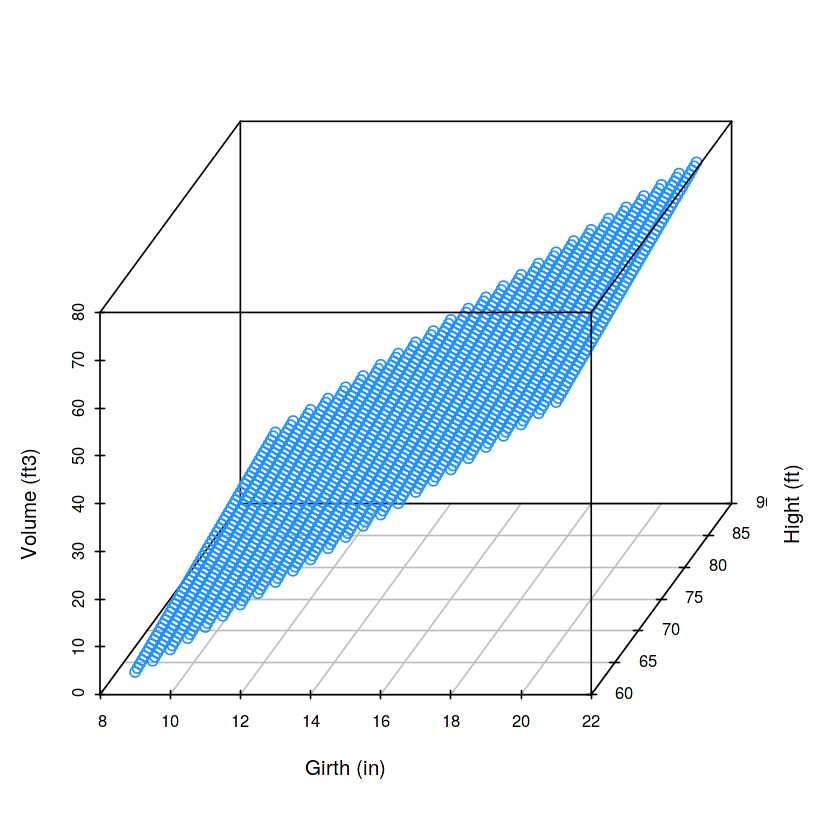

In [15]:
fit_2_sp <- scatterplot3d(pred_grid$Girth, pred_grid$Height, pred_grid$Volume2, angle = 60, color = "dodgerblue", pch = 1, ylab = "Hight (ft)", xlab = "Girth (in)", zlab = "Volume (ft3)" )

Ve nihayet, verilerin ne kadar iyi uyduklarını görmek için gerçek gözlemlerimizi paylaşalım:

In [16]:
library("ggplot2")

In [17]:
#fit_2_sp$points3d(trees$Girth, trees$Height, trees$Volume, pch=16)

Bu modelin ağacımızın hacmini tahmin etmekte nasıl olduğunu görelim. Bu kez, ağacımızın yüksekliğini dahil ediyoruz, çünkü modelimiz Yükseklik değerini değişken bir değişken olarak kullanıyor:

In [18]:
predict(model2, data.frame(Girth = 18.2, Height = 72))

1 
52.12695

Bu sefer, tahmini daha yüksek bir hacim ölçüsü alıyoruz (52,13 ft3.)  Bu öngörü, gerçek ağaç hacmimize, basit modelimizdekinden tek yordayıcı olarak kullandığımızdan daha yakındır, ancak, göreceğimiz gibi, iyileştirmeyi daha da artırdık.


### Etkileşimler için değerlendirme;

İyileştirmeler yaparken, yeni kurduğumuz model hala tüm hikayeyi tam olarak açıklamıyor. Ağaç çevresinin hacim üzerindeki etkisinin, ağaç yüksekliğinin hacim üzerindeki etkisinden bağımsız olduğu varsayılmaktadır. Açıkça durum böyle değildir, çünkü ağaç yüksekliği ve çevresi ilişkilidir; daha uzun boylu ağaçlar daha geniş olma eğilimindedir ve keşif verilerimiz görselleştirilmesinde de belirtilmiştir. Başka bir ifadeyle, yükseklik eğimi arttıkça çevrenin eğimi de artmalıdır. Tahmini değişkenlerin modelimizdeki bu bağımsız olmamasını hesaba katmak için, tahmine dayalı değişkenlerin ürünü olarak hesaplanan bir etkileşim terimi belirtebiliriz.

        - Tree Volume ≈ Intercept + Slope1(Tree Girth) + Slope2(Tree Height) + Slope3(Tree Girth x Tree Height)+ Error 

In [19]:
fit_3 <- lm(Volume ~ Girth * Height, data = trees)
summary(fit_3)


Call:
lm(formula = Volume ~ Girth * Height, data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5821 -1.0673  0.3026  1.5641  4.6649 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  69.39632   23.83575   2.911  0.00713 ** 
Girth        -5.85585    1.92134  -3.048  0.00511 ** 
Height       -1.29708    0.30984  -4.186  0.00027 ***
Girth:Height  0.13465    0.02438   5.524 7.48e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.709 on 27 degrees of freedom
Multiple R-squared:  0.9756,	Adjusted R-squared:  0.9728 
F-statistic: 359.3 on 3 and 27 DF,  p-value: < 2.2e-16


#### Not: Unutmayın

Modelimizde “Girth * Height” terimi,  “Girth + Height + Girth * Height” kısaltmasıdır.

Tahmin ettiğimiz gibi, çevre ve yüksekliğin etkileşimi önemlidir, bu da ağaç hacmini tahmin etmek için kullandığımız modelde etkileşim terimini dahil etmemiz gerektiğini göstermektedir. Bu karar aynı zamanda 1'e yakın ayarlanmış R2 değeri, F'nin büyük değeri ve modelimizin veriler için çok uygun olduğunu gösteren p'nin küçük değeri tarafından da desteklenmektedir. Bu modeli kullanarak ağaç hacmi için öngörülen değerleri görselleştirmek için bir dağılım grafiğine bakalım. Fit_2 görselleştirmesi için ürettiğimiz aynı yordayıcı değerleri ızgarasını kullanabiliriz:

In [20]:
Girth <- seq(9,21, by=0.5)
Height <- seq(60,90, by=0.5)
pred_grid <- expand.grid(Girth = Girth, Height = Height)

**Benzer şekilde görselleştirdiğimize**

fit_2 modeli, yordam değişkenlerinin ızgarasındaki hacim değerlerini tahmin etmek için etkileşim terimiyle fit_3 modelini kullanacağız:

In [21]:
#pred_grid$Volume3 <-predict(fit_3, new = pred_grid)

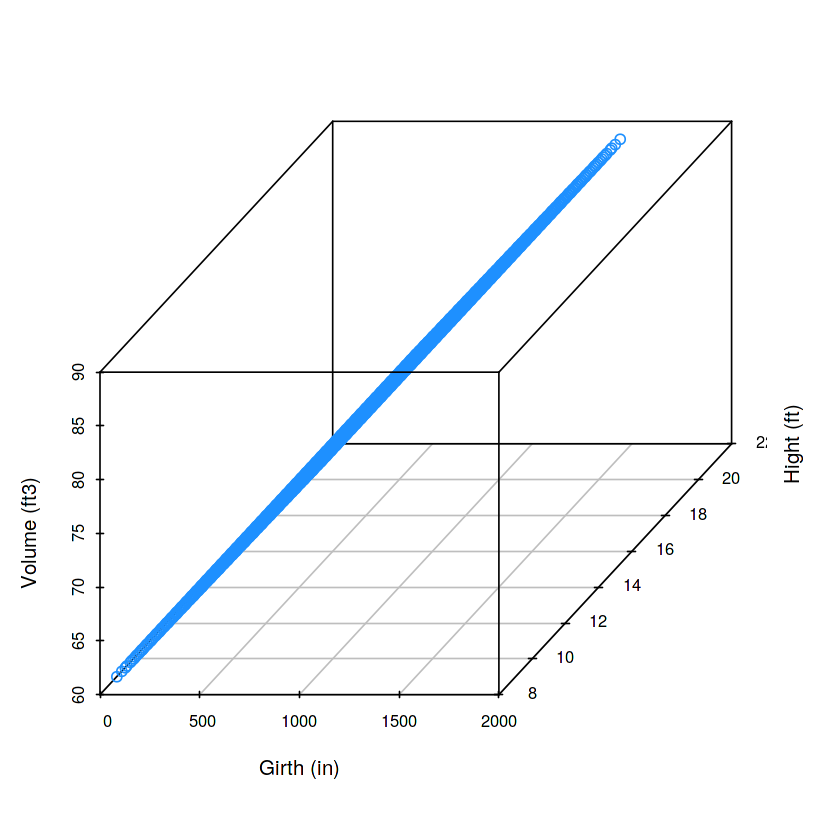

In [22]:
fit_3_sp <- scatterplot3d(pred_grid$Girth, pred_grid$Height, pred_grid$Volume3, angle = 60, color = "dodgerblue", pch = 1, ylab = "Hight (ft)", xlab = "Girth (in)", zlab = "Volume (ft3)")

#### Son olarak, gözlemlenen verilerimizi paylaşıyoruz:

In [23]:
#fit_3_sp$points3d(trees$Girth, trees$Height, trees$Volume, pch=16)

Bu resimde görmek biraz zor, ama bu sefer tahminlerimiz düz bir düzlem yerine eğri bir yüzeye uzanıyor. Şimdi gerçek şu an için: hadi ağacımızın hacmini tahmin etmek için bu modeli kullanalım.

In [24]:
predict(fit_3, data.frame(Girth = 18.2, Height = 72))

1 
45.881

Bu üçüncü modeli kullanarak tahmin ettiğimiz değer; 45.89, süper,  46.2 ft3 gerçek değerimize en yakın değer bu olmalı.

### Prediktif modeller hakkında bazı uyarıcı notlar 

**Verilerinizin kapsamını göz önünde bulundurun;**

Tahmin yapmak için bir model kullanırken, modeli oluşturmak için kullanılan değer aralığının çok ötesine tahmin etmeye çalışmaktan kaçınmak iyi bir fikirdir. Bu noktayı göstermek için, küçük bir fidanın hacmini (genç bir ağaç) tahmin etmeye çalışalım:

In [25]:
predict(fit_3, data.frame(Girth = 0.25, Height = 4))

1 
62.87867

Tahmini  62.88 ft3 hacim alıyoruz, veri setimizdeki yüksek ağaçlardan daha büyük. Tabii ki bu hiç mantıklı değil. Doğru tahminler yapabilmemizin, modellerimizi oluşturmak için kullandığımız veri yelpazesiyle sınırlı olduğunu unutmayın.

**Veri kümenize çok özel bir model yapmaktan kaçının**;

- Bu yazıda araştırdığımız basit örnek veri setinde, modelimize ikinci bir değişken eklemek, öngörücü yeteneğimizi geliştiriyor gibiydi. Bununla birlikte, birçok fark değişkenli çeşitli çoklu regresyon modellerini denediğinizde, en iyi modeli seçmek daha zor hale gelir. Modelin tahminde bulunma yeteneğini geliştirmeyen çok fazla terim varsa, risk alırız

- Modelimizi özel veri setimize “çok sığdırmak”. Belirli bir veri kümesine uyan bir model gelecekteki olayları öngörme veya farklı veri kümelerine uyma işlevselliğini yitirir ve bu nedenle çok faydalı değildir. Bu gönderide modelin geçerliliğini değerlendirmek için kullandığımız yöntemler (düzeltilmiş R2, artık dağılımlar) modelinizin verilerinize ne kadar uygun olduğunu anlamak için faydalı olsa da, modelinizi veri kümenizin farklı alt kümelerine uygulamak modelinizin performansının ne kadar iyi olacağı hakkında bilgi sağlayabilir. uygulamada. “Çapraz doğrulama” olarak bilinen bu yöntem, öngörücü modelleri test etmek için yaygın olarak kullanılır. Örneğimizde, üç ağacımızın her birini tek bir ağacın hacmini tahmin etmek için kullandık. Bununla birlikte, daha karmaşık modeller yapıyor olsaydık, çapraz doğrulama için verilerin bir alt kümesine bakmak isterdik.

### Sonraki adımlar
İki sürekli yordayıcı değişkeninden sürekli yanıt değişkenlerini yordamak için modeller oluşturmak için doğrusal regresyon kullandık, ancak doğrusal regresyon diğer birçok yaygın senaryo için faydalı bir tahmin edici modelleme aracıdır. Bir sonraki adım olarak, ikiden fazla yordayıcı değişkeninden gelen yanıt değişkenlerini tahmin etmek için doğrusal regresyon modelleri oluşturmayı deneyin. Bir regresyon modeline hangi değişkenleri dahil edeceğinize nasıl karar verebileceğinizi düşünün; Hangisinin önemli tahmin ediciler olduğunu nasıl söyleyebilirsiniz? Tahmini değişkenler arasındaki ilişkiler bu karara nasıl müdahale edebilir? R'deki çoklu doğrusal regresyon problemleri üzerinde çalışmak için yararlı olan veri kümeleri şunlardır:

airquality, iris ve mtcarlar. Verilerden model oluşturmada bir diğer önemli kavram, verilerinizi mevcut olanlardan hesaplanan yeni öngörücülerle artırmaktır. Buna özellik mühendisliği denir ve bu noktada, problemle ilgili olabilecek başka şeylerle ilgili kendi uzman bilginizi kullandığınız yer burasıdır. Örneğin, değişkenlerden biri olarak zaman damgası olan banka işlemlerinin bir veritabanına bakıyorsanız, haftanın o günü cevaplamak istediğiniz soruyla ilgili olabilir, böylece bunu zaman damgasından hesaplayabilir ve ekleyebilirsiniz. veritabanına yeni bir değişken olarak. Bu karmaşık bir konudur ve daha fazla yordayıcı değişken eklemek her zaman iyi bir fikir değildir, ancak modelleme hakkında daha fazla şey öğrenirken aklınızda tutmanız gereken bir şeydir. Bu gönderide kullanılan ağaçlar veri kümesinde, hacmi tahmin etmenize yardımcı olacak çevre ve yükseklikten hesaplayabileceğiniz ek miktarları düşünebiliyor musunuz? (İpucu: çeşitli geometrik şekillerin hacimlerinin formülünü öğrendiğiniz zamanları düşünün ve bir ağacın nasıl göründüğünü düşünün.) Son olarak, sürekli verilere odaklanmamıza rağmen, doğrusal değişkenlik kategorik değişkenlerden tahminler yapmak için genişletilebilir, çok. Sürekli ve değişkenli değişkenlerin yanı sıra kategorikteki tepki değişkenlerini de tahmin etmek için doğrusal regresyon modellerini kullanmayı deneyin. R'de kendilerini bu alıştırmaya özellikle iyi borç veren birkaç veri seti vardır: ToothGrowth, PlantGrowth ve npk.


Kaynak: [Link](https://www.dataquest.io/blog/statistical-learning-for-predictive-modeling-r/)